
Exploración de Datasets

Este notebook te ayuda a entender los datos antes de entrenar cualquier modelo.
 
¿Por qué explorar primero?

 1. **Conocer la estructura**: ¿Cuántas filas? ¿Qué columnas?
 2. **Detectar problemas**: ¿Hay valores faltantes? ¿Outliers?
 3. **Entender las variables**: ¿Qué significa cada columna?
 4. **Visualizar patrones**: ¿Hay correlaciones?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Librerías cargadas correctamente")

Librerías cargadas correctamente


Dataset Meteorológico (NASA Power)
¿Qué contiene?

Mediciones mensuales de regiones de Sudamérica

12 años de datos (2012-2024 aproximadamente)

Variables como: temperatura, precipitación, humedad, radiación solar


2.1 Cargar y explorar estructura

In [4]:
df_weather = pd.read_csv('../data/raw/weather/southamerica_weather.csv')

print("=" * 50)
print("DATOS METEOROLÓGICOS - Estructura")
print("=" * 50)
print(f"Filas: {len(df_weather):,}")
print(f"Columnas: {len(df_weather.columns)}")
print()
print("Memoria usada:", df_weather.memory_usage(deep=True).sum() / 1024**2, "MB")

DATOS METEOROLÓGICOS - Estructura
Filas: 6,240
Columnas: 378

Memoria usada: 18.37063980102539 MB


In [5]:
print("Primeras 3 filas:")
df_weather.head(3)

Primeras 3 filas:


,Unnamed: 0,region,Year,lat,lng,alt,T2M_1,T2M_2,T2M_3,T2M_4,...,ET0_3,ET0_4,ET0_5,ET0_6,ET0_7,ET0_8,ET0_9,ET0_10,ET0_11,ET0_12
0,0,southamerica_0,1984.0,-55.75,-76.75,0.0,6.412581,6.890345,6.856774,5.849333,...,6.051722,5.848703,4.631534,4.401700,4.484357,5.089419,5.421237,5.650907,6.921861,7.215805
1,1,southamerica_0,1984.0,-55.75,-76.25,0.0,6.399032,6.951724,6.901935,5.898667,...,6.072816,5.865366,4.647205,4.413094,4.506070,5.121672,5.419151,5.671978,6.902915,7.220709
2,2,southamerica_0,1984.0,-55.75,-75.75,0.0,6.404194,6.999310,6.964516,5.970000,...,6.077169,5.815842,4.648862,4.439208,4.513186,5.145247,5.410753,5.740099,6.758475,7.245964


In [6]:
# Ver todas las columnas
print("Lista de columnas:")
for i, col in enumerate(df_weather.columns, 1):
    print(f"  {i:3d}. {col}")

Lista de columnas:
    1. Unnamed: 0
    2. region
    3. Year
    4. lat
    5. lng
    6. alt
    7. T2M_1
    8. T2M_2
    9. T2M_3
   10. T2M_4
   11. T2M_5
   12. T2M_6
   13. T2M_7
   14. T2M_8
   15. T2M_9
   16. T2M_10
   17. T2M_11
   18. T2M_12
   19. T2M_MAX_1
   20. T2M_MAX_2
   21. T2M_MAX_3
   22. T2M_MAX_4
   23. T2M_MAX_5
   24. T2M_MAX_6
   25. T2M_MAX_7
   26. T2M_MAX_8
   27. T2M_MAX_9
   28. T2M_MAX_10
   29. T2M_MAX_11
   30. T2M_MAX_12
   31. T2M_MIN_1
   32. T2M_MIN_2
   33. T2M_MIN_3
   34. T2M_MIN_4
   35. T2M_MIN_5
   36. T2M_MIN_6
   37. T2M_MIN_7
   38. T2M_MIN_8
   39. T2M_MIN_9
   40. T2M_MIN_10
   41. T2M_MIN_11
   42. T2M_MIN_12
   43. WD2M_1
   44. WD2M_2
   45. WD2M_3
   46. WD2M_4
   47. WD2M_5
   48. WD2M_6
   49. WD2M_7
   50. WD2M_8
   51. WD2M_9
   52. WD2M_10
   53. WD2M_11
   54. WD2M_12
   55. WS2M_1
   56. WS2M_2
   57. WS2M_3
   58. WS2M_4
   59. WS2M_5
   60. WS2M_6
   61. WS2M_7
   62. WS2M_8
   63. WS2M_9
   64. WS2M_10
   65. WS2M_11
   6

2.2 Tipos de datos

¿Por qué importa el tipo de dato?

Las redes neuronales trabajan con números (float)

Si hay texto, hay que convertirlo o eliminarlo

In [7]:
print("Tipos de datos:")
print(df_weather.dtypes.value_counts())
print()
print("Columnas por tipo:")
for dtype in df_weather.dtypes.unique():
    cols = df_weather.select_dtypes(include=[dtype]).columns.tolist()
    print(f"\n{dtype}: {len(cols)} columnas")
    print(f"  Ejemplos: {cols[:5]}")

Tipos de datos:
float64    376
int64        1
object       1
Name: count, dtype: int64

Columnas por tipo:

int64: 1 columnas
  Ejemplos: ['Unnamed: 0']

object: 1 columnas
  Ejemplos: ['region']

float64: 376 columnas
  Ejemplos: ['Year', 'lat', 'lng', 'alt', 'T2M_1']


3 Valores faltantes (NaN)

¿Por qué son problemáticos los NaN?

Las redes neuronales no pueden procesar NaN

Hay que imputarlos (rellenar) o eliminar esas filas

In [8]:
# Contar NaN por columna
nan_counts = df_weather.isnull().sum()
nan_cols = nan_counts[nan_counts > 0]

if len(nan_cols) > 0:
    print(f"Columnas con valores faltantes: {len(nan_cols)}")
    print(nan_cols.sort_values(ascending=False).head(10))
else:
    print("No hay valores faltantes")

No hay valores faltantes


3.1 Cargar MNIST

Nota: La primera vez se descarga automáticamente (~11 MB)

In [10]:
import pandas as pd

print("Cargando MNIST desde archivo local...")
mnist_df = pd.read_parquet('../data/raw/mnist/train-00000-of-00001.parquet')

print(f"Columnas del archivo: {mnist_df.columns.tolist()}")
print(f"Filas totales: {len(mnist_df)}")

# Extraer imágenes y etiquetas
# Las imágenes están en la columna 'image' como diccionarios con 'bytes'
# Las etiquetas están en la columna 'label'
y_all = mnist_df['label'].values

# Extraer y procesar las imágenes
# Cada imagen es un diccionario {'bytes': b'...', 'path': None}
from PIL import Image
import io

def extract_image(img_dict):
    """Extrae la imagen del diccionario y la convierte a array numpy"""
    img_bytes = img_dict['bytes']
    img = Image.open(io.BytesIO(img_bytes))
    return np.array(img)

print("Procesando imágenes...")
X_all = np.array([extract_image(img) for img in mnist_df['image'].values])

# Dividir en train y test (60,000 train, resto test)
X_train = X_all[:60000]
X_test = X_all[60000:]
y_train = y_all[:60000]
y_test = y_all[60000:]

print("\n" + "=" * 50)
print("MNIST - Estructura")
print("=" * 50)
print(f"Entrenamiento: {X_train.shape[0]:,} imágenes")
print(f"Test: {X_test.shape[0]:,} imágenes")
print(f"Forma de cada imagen: {X_train.shape[1:]} (28x28 píxeles)")
print(f"Valores de píxeles: {X_train.min()} a {X_train.max()}")
print(f"Clases (dígitos): {np.unique(y_train)}")

Cargando MNIST desde archivo local...
Columnas del archivo: ['image', 'label']
Filas totales: 60000
Procesando imágenes...

MNIST - Estructura
Entrenamiento: 60,000 imágenes
Test: 0 imágenes
Forma de cada imagen: (28, 28) (28x28 píxeles)
Valores de píxeles: 0 a 255
Clases (dígitos): [0 1 2 3 4 5 6 7 8 9]


3.2 Visualizar ejemplos

¿Por qué visualizar?

Ver qué variedad hay en los datos

Entender qué tan difícil es el problema

Detectar posibles errores en las etiquetas

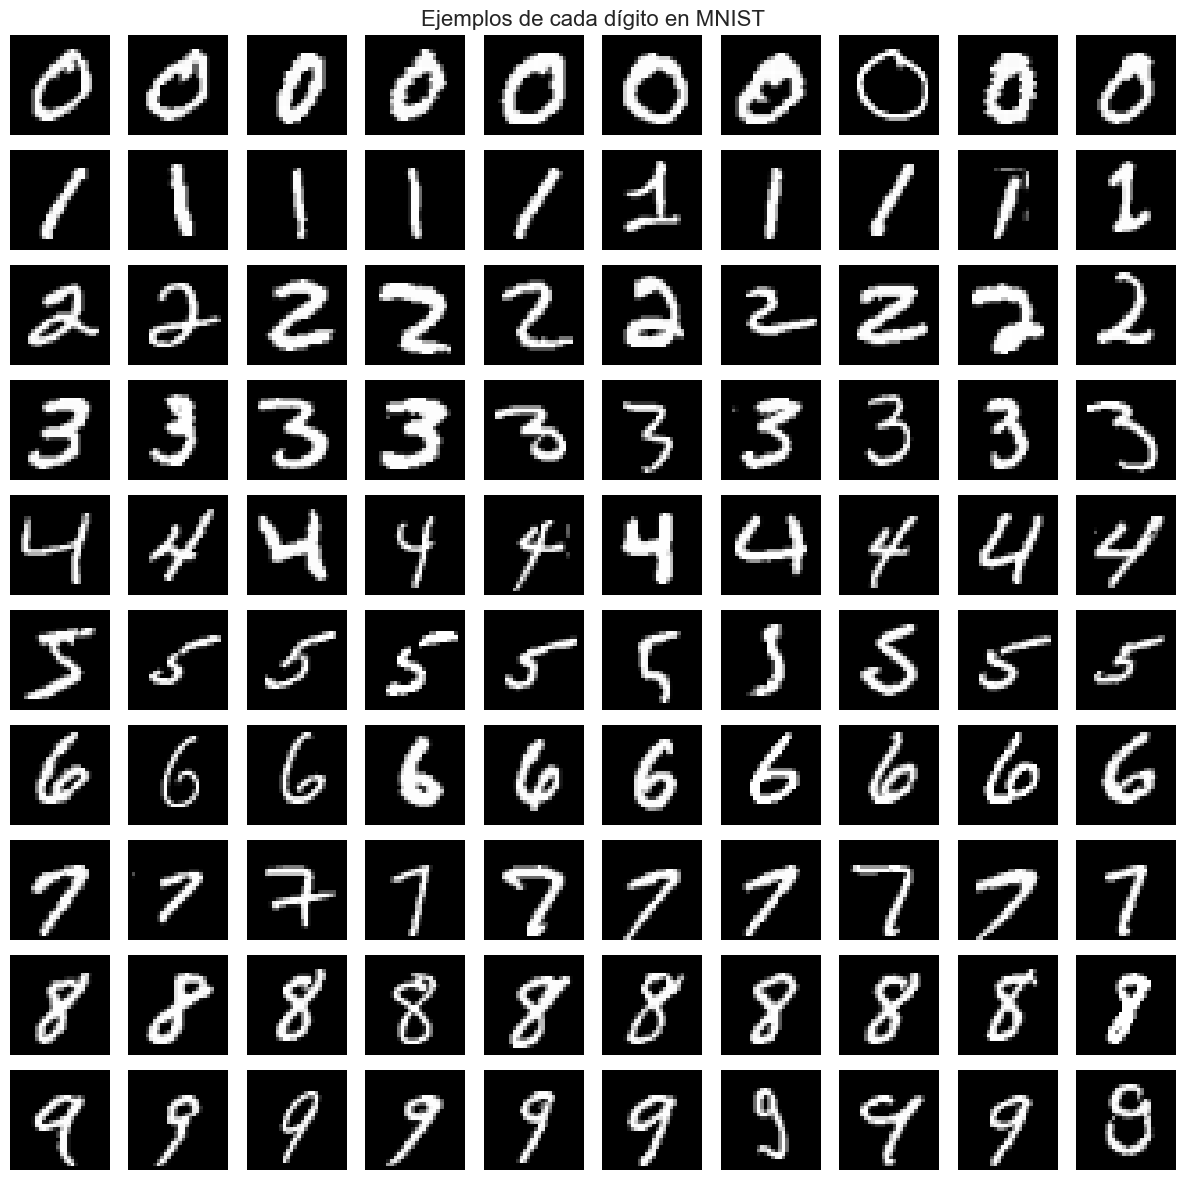

Gráfico guardado en results/mnist_samples.png


In [11]:
# Mostrar 10 ejemplos de cada dígito
fig, axes = plt.subplots(10, 10, figsize=(12, 12))

for digit in range(10):
    # Encontrar índices de este dígito
    indices = np.where(y_train == digit)[0][:10]
    
    for i, idx in enumerate(indices):
        axes[digit, i].imshow(X_train[idx], cmap='gray')
        axes[digit, i].axis('off')
        if i == 0:
            axes[digit, i].set_ylabel(f'{digit}', fontsize=14, rotation=0, labelpad=20)

plt.suptitle('Ejemplos de cada dígito en MNIST', fontsize=16)
plt.tight_layout()
plt.savefig('../results/mnist_samples.png', dpi=100)
plt.show()
print("Gráfico guardado en results/mnist_samples.png")

3.3 Distribución de clases

¿Por qué importa?

Si hay muchos más ejemplos de un dígito, el modelo puede sesgarse

Ideal: distribución balanceada

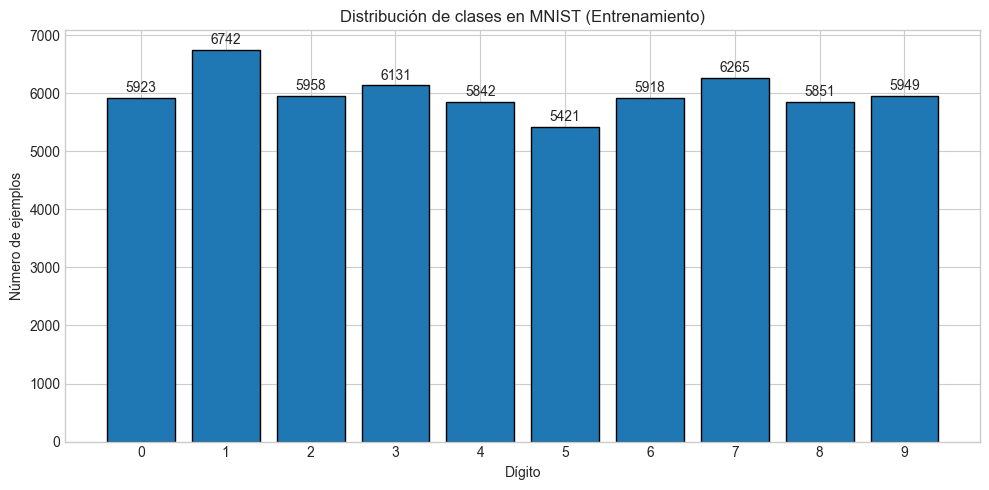

Gráfico guardado en results/mnist_class_distribution.png


In [13]:
# Contar ejemplos por clase
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 5))
plt.bar(unique, counts, edgecolor='black')
plt.xlabel('Dígito')
plt.ylabel('Número de ejemplos')
plt.title('Distribución de clases en MNIST (Entrenamiento)')
plt.xticks(unique)

# Añadir números encima de las barras
for i, (u, c) in enumerate(zip(unique, counts)):
    plt.text(u, c + 100, str(c), ha='center')

plt.tight_layout()
plt.savefig('../results/mnist_class_distribution.png', dpi=100)
plt.show()
print("Gráfico guardado en results/mnist_class_distribution.png")

3.4 Ejemplo de preprocesamiento

Normalización: Convertir valores [0-255] a [0-1]

In [14]:
# Normalizar
X_train_normalized = X_train.astype('float32') / 255.0

print("Antes de normalizar:")
print(f"  Min: {X_train[0].min()}, Max: {X_train[0].max()}")
print()
print("Después de normalizar:")
print(f"  Min: {X_train_normalized[0].min():.2f}, Max: {X_train_normalized[0].max():.2f}")

Antes de normalizar:
  Min: 0, Max: 255

Después de normalizar:
  Min: 0.00, Max: 1.00



 4. Resumen
 
 | Dataset | Filas | Uso | Tipo de problema |
 |---------|-------|-----|------------------|
 | Meteorológico | ~50,000+ | Predecir temperatura | Regresión |
 | MNIST | 70,000 | Clasificar dígitos | Clasificación |
 
 Siguiente paso
 
  Fase 3: Implementar redes neuronales desde cero